## LIBRARIES

In [1]:
## FILE MANAGEMENT
import os

## DATA TABLES
import numpy as np
import pandas as pd
import geopandas as gpd
# pd.set_option('display.float_format', str) # optional: set number format in Pandas tables

## API CALL
from urllib.parse import urlencode
import urllib.request
import json
# from sodapy import Socrata

## VISUALIZATION
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

## FONTS

In [2]:
allfontsList = fm.findSystemFonts()
allfontsNames = [fm.FontProperties(fname=fname).get_name() for fname in allfontsList]
# for i,f in enumerate(allfontNames):
#     print("[{}] '{}'\n'{}'".format(i,f,allfontsList[i].split('\\')[-1]))

selfont = 'Univers'
selfontsList = [f for f in allfontsList if selfont in f]
selfontsNames = [fm.FontProperties(fname=fname).get_name() for fname in selfontsList]
for i,f in enumerate(selfontsList):
    print("[{}] '{}'\n'{}'".format(i,selfontsNames[i],f.split('\\')[-1]))
    
for font_file in selfontsList:
    fm.fontManager.addfont(font_file)

[0] 'Univers'
'Univers-BoldExtObl.otf'
[1] 'Univers'
'Univers-BlackExt.otf'
[2] 'Univers'
'Univers-Condensed.otf'
[3] 'Univers'
'Univers-CondensedBold.otf'
[4] 'Univers'
'Univers-Black.otf'
[5] 'Univers'
'Univers.otf'
[6] 'Univers'
'Univers-BoldExt.otf'
[7] 'Univers'
'Univers-UltraCondensed.otf'
[8] 'Univers'
'Univers-Extended.otf'
[9] 'Univers'
'Univers-BoldOblique.otf'
[10] 'Univers'
'Univers-LightOblique.otf'
[11] 'Univers'
'Univers-ExtraBlack.otf'
[12] 'Univers'
'Univers-Light.otf'
[13] 'Univers'
'Univers-CondensedLtOblique.otf'
[14] 'Univers'
'Univers-ExtraBlackObl.otf'
[15] 'Univers'
'Univers-ExtraBlackExtObl.otf'
[16] 'Univers'
'Univers-Oblique.otf'
[17] 'Univers'
'Univers-CondensedOblique.otf'
[18] 'Univers'
'Univers-ThinUltraCondensed.otf'
[19] 'Univers'
'Univers-CondensedBdOblique.otf'
[20] 'Univers'
'Univers-ExtraBlackExt.otf'
[21] 'Univers'
'Univers-Bold.otf'
[22] 'Univers'
'Univers-ExtendedObl.otf'
[23] 'Univers'
'Univers-BlackExtObl.otf'
[24] 'Univers'
'Univers-LightUltra

In [3]:
## Set Univers as Default
font = {'family' : 'sans-serif',
        'sans-serif' : ['Univers']}
plt.rc('font',**font)

## Run this cell again if you need to reset to Matplotlib defaults
# plt.style.use('default')
# plt.rcdefaults()

# Gathering and Cleaning Data

## DOB Permit Issuance

Department of Buildings (DOB). “DOB Permit Issuance.” CSV, Table. \
New York: NYC OpenData, July 26, 2024. \
Accessed July 26th, 2024 via:
https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a/about_data.



### Columns of Note:

**Temporal Reference, for Time Series**

| Column Name | API Field Name |
| --- | --- |
| 'Filing Date' | filing_date | 
| 'Issuance Date' |  issuance_date |
| 'Job Start Date' | job_start_date |

**Spatial Reference, for Spatial Join**

| Column Name | API Field Name |
| --- | --- |
| 'LATITUDE' | gis_latitude | 
| 'LONGITUDE' | gis_longitude |
| 'Lot' | lot |
| 'Block' | block |
| 'BOROUGH' | borough |
| 'CENSUS_TRACT' | gis_census_tract |
| 'NTA_NAME' | gis_nta_name |
| 'COUNCIL_DISTRICT' | gis_council_district |

*For BOROUGH: 1= Manhattan, 2= Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island*

In [4]:
## Column Dictionary with column and API names (copied from website)
columnguide = pd.read_csv("metadata/DD_DOB_Permit_Issuance_Columns.csv")

## Cleaned API Field name (without underscores)
columnguide['Clean API Field Name'] = columnguide['API Field Name'].str.strip("_")
display(columnguide)

,Column Name,Description,API Field Name,Data Type,shortname,Clean API Field Name
0,BOROUGH,"1= Manhattan, 2= Bronx, 3 = Brooklyn, 4 = Quee...",borough,Text,boro,borough
1,Bin #,Number assigned by City Planning to a specific...,bin__,Text,bin,bin
2,House #,House Number of Residence or Commercial Property,house__,Text,house,house
3,Street Name,Street Name where Property is located,street_name,Text,street,street_name
4,Job #,Number assigned by DOB to Job Filing,job__,Text,jobnum,job
5,Job doc. #,Document Number,job_doc___,Text,jobdoc,job_doc
6,Job Type,"Job Type, based on DOB Job Code (NB-New Buildi...",job_type,Text,jobtype,job_type
7,Self_Cert,Self_Cert,self_cert,Text,selfcert,self_cert
8,Block,Tax block assigned by Department of Finance,block,Text,block,block
9,Lot,Tax lot assigned by Department of Finance,lot,Text,lot,lot


#### Dictionaries for Short Name (Shapefile Export)

In [5]:
## dictionaries for 'column=' in .rename(), 10 characters during shapefile export
renamecol_dict = dict(zip(columnguide['Column Name'], columnguide['shortname'])) # downloaded file columns name to clean name
renameapi_dict = dict(zip(columnguide['API Field Name'], columnguide['shortname'])) # API column name to clean name
renameclean_dict = dict(zip(columnguide['Clean API Field Name'], columnguide['shortname'])) # Clean name to short name (for shapefiles)
longname_dict = dict(zip(columnguide['shortname'], columnguide['Clean API Field Name'])) # vice versa

display(renamecol_dict)
display(renameapi_dict)
display(renameclean_dict)
display(longname_dict)

{'BOROUGH': 'boro',
 'Bin #': 'bin',
 'House #': 'house',
 'Street Name': 'street',
 'Job #': 'jobnum',
 'Job doc. #': 'jobdoc',
 'Job Type': 'jobtype',
 'Self_Cert': 'selfcert',
 'Block': 'block',
 'Lot': 'lot',
 'Community Board': 'CB',
 'Zip Code': 'zip',
 'Bldg Type': 'bldgtype',
 'Residential': 'res',
 'Special District 1': 'spd1',
 'Special District 2': 'spd2',
 'Work Type': 'worktype',
 'Permit Status': 'status',
 'Filing Status': 'statusfil',
 'Permit Type': 'type',
 'Permit Sequence #': 'seqnum',
 'Permit Subtype': 'subtype',
 'Oil Gas': 'oilgas',
 'Site Fill': 'sitefill',
 'Filing Date': 'datefil',
 'Issuance Date': 'dateiss',
 'Expiration Date': 'dateexp',
 'Job Start Date': 'datejob',
 "Permittee's First Name": 'P_fname',
 "Permittee's Last Name": 'P_lname',
 "Permittee's Business Name": 'P_bname',
 "Permittee's Phone #": 'P_phone',
 "Permittee's License Type": 'P_lictype',
 "Permittee's License #": 'P_licnum',
 'Act as Superintendent': 'P_supt',
 "Permittee's Other Title":

{'borough': 'boro',
 'bin__': 'bin',
 'house__': 'house',
 'street_name': 'street',
 'job__': 'jobnum',
 'job_doc___': 'jobdoc',
 'job_type': 'jobtype',
 'self_cert': 'selfcert',
 'block': 'block',
 'lot': 'lot',
 'community_board': 'CB',
 'zip_code': 'zip',
 'bldg_type': 'bldgtype',
 'residential': 'res',
 'special_district_1': 'spd1',
 'special_district_2': 'spd2',
 'work_type': 'worktype',
 'permit_status': 'status',
 'filing_status': 'statusfil',
 'permit_type': 'type',
 'permit_sequence__': 'seqnum',
 'permit_subtype': 'subtype',
 'oil_gas': 'oilgas',
 'site_fill': 'sitefill',
 'filing_date': 'datefil',
 'issuance_date': 'dateiss',
 'expiration_date': 'dateexp',
 'job_start_date': 'datejob',
 'permittee_s_first_name': 'P_fname',
 'permittee_s_last_name': 'P_lname',
 'permittee_s_business_name': 'P_bname',
 'permittee_s_phone__': 'P_phone',
 'permittee_s_license_type': 'P_lictype',
 'permittee_s_license__': 'P_licnum',
 'act_as_superintendent': 'P_supt',
 'permittee_s_other_title':

{'borough': 'boro',
 'bin': 'bin',
 'house': 'house',
 'street_name': 'street',
 'job': 'jobnum',
 'job_doc': 'jobdoc',
 'job_type': 'jobtype',
 'self_cert': 'selfcert',
 'block': 'block',
 'lot': 'lot',
 'community_board': 'CB',
 'zip_code': 'zip',
 'bldg_type': 'bldgtype',
 'residential': 'res',
 'special_district_1': 'spd1',
 'special_district_2': 'spd2',
 'work_type': 'worktype',
 'permit_status': 'status',
 'filing_status': 'statusfil',
 'permit_type': 'type',
 'permit_sequence': 'seqnum',
 'permit_subtype': 'subtype',
 'oil_gas': 'oilgas',
 'site_fill': 'sitefill',
 'filing_date': 'datefil',
 'issuance_date': 'dateiss',
 'expiration_date': 'dateexp',
 'job_start_date': 'datejob',
 'permittee_s_first_name': 'P_fname',
 'permittee_s_last_name': 'P_lname',
 'permittee_s_business_name': 'P_bname',
 'permittee_s_phone': 'P_phone',
 'permittee_s_license_type': 'P_lictype',
 'permittee_s_license': 'P_licnum',
 'act_as_superintendent': 'P_supt',
 'permittee_s_other_title': 'P_title',
 'h

{'boro': 'borough',
 'bin': 'bin',
 'house': 'house',
 'street': 'street_name',
 'jobnum': 'job',
 'jobdoc': 'job_doc',
 'jobtype': 'job_type',
 'selfcert': 'self_cert',
 'block': 'block',
 'lot': 'lot',
 'CB': 'community_board',
 'zip': 'zip_code',
 'bldgtype': 'bldg_type',
 'res': 'residential',
 'spd1': 'special_district_1',
 'spd2': 'special_district_2',
 'worktype': 'work_type',
 'status': 'permit_status',
 'statusfil': 'filing_status',
 'type': 'permit_type',
 'seqnum': 'permit_sequence',
 'subtype': 'permit_subtype',
 'oilgas': 'oil_gas',
 'sitefill': 'site_fill',
 'datefil': 'filing_date',
 'dateiss': 'issuance_date',
 'dateexp': 'expiration_date',
 'datejob': 'job_start_date',
 'P_fname': 'permittee_s_first_name',
 'P_lname': 'permittee_s_last_name',
 'P_bname': 'permittee_s_business_name',
 'P_phone': 'permittee_s_phone',
 'P_lictype': 'permittee_s_license_type',
 'P_licnum': 'permittee_s_license',
 'P_supt': 'act_as_superintendent',
 'P_title': 'permittee_s_other_title',
 'h

### Load DOB Permits Data as df_permits

#### OPTION A: filtered from local file, as of July 26th, 2024
Downloaded file uses "Column Name" above

In [6]:
## downloaded file on local drive (must filter extraneous values, but quicker than API):
## 3,968,960 rows x 60 columns, as of July 26th, 2024
permits_CSV = "data/_download/DOB_Permit_Issuance_20240726.csv" 
df_permits_JUL26 = pd.read_csv(permits_CSV)

display(df_permits_JUL26)

C:\Users\willy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,10,15,31,33,36,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,853.0,2.0,...,NaN,NaN,2125942700.0,05/11/2022 00:00:00,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,5687.0,66.0,...,NaN,NaN,9174201655.0,05/11/2022 00:00:00,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,64.0,22.0,...,NaN,NaN,7188125847.0,05/11/2022 00:00:00,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,5260.0,1.0,...,NaN,NaN,3478575846.0,05/11/2022 00:00:00,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,4242.0,45.0,...,NaN,NaN,7186195891.0,05/11/2022 00:00:00,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968955,BROOKLYN,3392888,13,HARRISON AVENUE,300622459,2,NB,NaN,2208,2,...,NaN,NaN,7188798779.0,07/26/2024 00:00:00,3978160,40.706358,-73.954057,33.0,529.0,Williamsburg
3968956,QUEENS,4143518,141-32,73 AVENUE,421323400,1,A1,N,6624,17,...,NaN,NaN,9176780692.0,07/26/2024 00:00:00,3978568,40.724301,-73.821978,24.0,77902.0,Kew Gardens Hills
3968957,BROOKLYN,3061471,78,BARTLETT STREET,321590202,1,NB,N,2273,2,...,NaN,NaN,3476872448.0,07/26/2024 00:00:00,3978631,40.701946,-73.945188,33.0,507.0,Bedford
3968958,BROOKLYN,3323958,814,5 AVENUE,321459355,1,NB,N,685,35,...,NaN,NaN,3472950655.0,07/26/2024 00:00:00,3979197,40.654549,-74.000512,38.0,84.0,Sunset Park West


##### Initial Cleaning for Method A

In [12]:
df = df_permits_JUL26.copy()

## Preview job types - want A1 and NB
df['Job Type'].value_counts()

## Filter table for relevant types and sort by common index
df_permits = df[df['Job Type'].isin(['A1', 'NB'])] # New Building or Major Alteration A1
df_permits = df_permits.sort_values('PERMIT_SI_NO', ascending=True) # sort by issuance date

## set date columns to datetime
for i,c in enumerate(['Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date', 'DOBRunDate']):
    df_permits[c] = pd.to_datetime(df_permits[c], errors='coerce')

## bad apostrophes
df_permits = df_permits.rename(columns={'Owner’s House City':'O_hcity',
                                        'Owner’s House State':'O_hstate', 
                                        'Owner’s House Zip Code':'O_hzip'})
## short names
df_permits = df_permits.rename(columns=renamecol_dict).reset_index(drop=True)
display(df_permits)

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746.0,38.0,...,NY,11103.0,7187288038,2017-11-03,11,40.767000,-73.903647,22.0,141.0,Astoria
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,NaN,NaN,5164370900.0,2022-05-09,29,40.680620,-73.771680,27.0,33401.0,St. Albans
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760.0,49.0,...,NaN,NaN,NaN,2022-05-09,41,40.641958,-74.000555,38.0,94.0,Sunset Park East
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610.0,34.0,...,NY,11103.0,7187288038,2017-11-03,42,40.758169,-73.925177,26.0,57.0,Astoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996468,MANHATTAN,1063920,659,WEST 179 STREET,122475963,1,A1,Y,2163,43,...,NaN,NaN,9176269230.0,2024-07-26,3979309,40.848686,-73.936363,10.0,263.0,Washington Heights South
996469,QUEENS,4292405,156-19,89 STREET,421133071,1,A1,N,13954,48,...,NaN,NaN,3478825677.0,2024-07-26,3979310,40.663192,-73.844745,32.0,892.0,Lindenwood-Howard Beach
996470,STATEN ISLAND,5174422,433,CLOVE ROAD,520385896,1,NB,N,223,9,...,NaN,NaN,3472424779.0,2024-07-26,3979313,40.629760,-74.123546,49.0,125.0,West New Brighton-New Brighton-St. George
996471,STATEN ISLAND,5006036,429,CLOVE ROAD,520382826,1,NB,N,223,10,...,NaN,NaN,3472424779.0,2024-07-26,3979314,40.629990,-74.123701,49.0,125.0,West New Brighton-New Brighton-St. George


##### Save df_permits dataframe, using Option A (local file)

In [13]:
## save file from filtered CSV
df_permits.to_csv('data/df_permits_CSV.csv')

##### Load df_permits dataframe, using Option A (local file)

In [14]:
## reload file from filtered CSV
df_permits = pd.read_csv('data/df_permits_CSV.csv', index_col=0)
display(df_permits)

C:\Users\willy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,10,11,16,32,34,35,36,48,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746.0,38.0,...,NY,11103.0,7187288038,2017-11-03,11,40.767000,-73.903647,22.0,141.0,Astoria
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529.0,247.0,...,NaN,NaN,5164370900.0,2022-05-09,29,40.680620,-73.771680,27.0,33401.0,St. Albans
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760.0,49.0,...,NaN,NaN,NaN,2022-05-09,41,40.641958,-74.000555,38.0,94.0,Sunset Park East
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610.0,34.0,...,NY,11103.0,7187288038,2017-11-03,42,40.758169,-73.925177,26.0,57.0,Astoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996468,MANHATTAN,1063920,659,WEST 179 STREET,122475963,1,A1,Y,2163.0,43.0,...,NaN,NaN,9176269230.0,2024-07-26,3979309,40.848686,-73.936363,10.0,263.0,Washington Heights South
996469,QUEENS,4292405,156-19,89 STREET,421133071,1,A1,N,13954.0,48.0,...,NaN,NaN,3478825677.0,2024-07-26,3979310,40.663192,-73.844745,32.0,892.0,Lindenwood-Howard Beach
996470,STATEN ISLAND,5174422,433,CLOVE ROAD,520385896,1,NB,N,223.0,9.0,...,NaN,NaN,3472424779.0,2024-07-26,3979313,40.629760,-74.123546,49.0,125.0,West New Brighton-New Brighton-St. George
996471,STATEN ISLAND,5006036,429,CLOVE ROAD,520382826,1,NB,N,223.0,10.0,...,NaN,NaN,3472424779.0,2024-07-26,3979314,40.629990,-74.123701,49.0,125.0,West New Brighton-New Brighton-St. George


#### OPTION B: filtered from API

In [15]:
## use API (can take a long time to call, but can be updated)
permits_API = "https://data.cityofnewyork.us/resource/ipu4-2q9a.csv?" # API

## Filter query for relevant types and sort by common index
permits_query = {'$select':'*', # select all
                 '$where':'job_type="A1" or job_type="NB"', # New Building or Major Alteration A1
                 '$order':'permit_si_no', # order by issuance_date
                 '$limit':4000000} # set max limit to 4M, above 3,968,960

df_permits = pd.read_csv(permits_API + urlencode(permits_query),
                         ## set date columns to datetime
                         parse_dates = ['filing_date', 'issuance_date', 'expiration_date', 'job_start_date', 'dobrundate'])

display(df_permits)

C:\Users\willy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,10,15,31,33,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,borough,bin__,house__,street_name,job__,job_doc___,job_type,self_cert,block,lot,...,state,owner_s_zip_code,owner_s_phone__,dobrundate,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,NaN,3960.0,25.0,...,NaN,NaN,7184454700,2022-05-09,100,40.790594,-73.838244,19.0,945.0,Whitestone
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,NaN,5030.0,76.0,...,NaN,NaN,7186242615,2022-05-09,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,NaN,4615.0,6.0,...,NaN,NaN,7187466014,2022-05-09,100001,40.787958,-73.795952,19.0,991.0,Whitestone
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,NaN,1903.0,139.0,...,NaN,NaN,2126782100,2022-05-09,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996492,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,NaN,5030.0,75.0,...,NaN,NaN,7182919595,2022-05-09,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate
996493,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824.0,71.0,...,NaN,NaN,7184656400,2022-05-09,999987,40.710120,-73.791458,27.0,462.0,Jamaica
996494,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051.0,80.0,...,NaN,NaN,2120000000,2022-05-09,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights
996495,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,NaN,5495.0,431.0,...,NaN,NaN,9179067575,2022-05-09,999998,40.619611,-73.978647,44.0,468.0,Borough Park


##### Initial Cleaning for Method B

In [16]:
df_permits = df_permits.rename(columns=renameapi_dict).reset_index(drop=True)
display(df_permits)

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,NaN,3960.0,25.0,...,NaN,NaN,7184454700,2022-05-09,100,40.790594,-73.838244,19.0,945.0,Whitestone
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,NaN,5030.0,76.0,...,NaN,NaN,7186242615,2022-05-09,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,NaN,4615.0,6.0,...,NaN,NaN,7187466014,2022-05-09,100001,40.787958,-73.795952,19.0,991.0,Whitestone
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,NaN,1903.0,139.0,...,NaN,NaN,2126782100,2022-05-09,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996492,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,NaN,5030.0,75.0,...,NaN,NaN,7182919595,2022-05-09,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate
996493,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824.0,71.0,...,NaN,NaN,7184656400,2022-05-09,999987,40.710120,-73.791458,27.0,462.0,Jamaica
996494,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051.0,80.0,...,NaN,NaN,2120000000,2022-05-09,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights
996495,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,NaN,5495.0,431.0,...,NaN,NaN,9179067575,2022-05-09,999998,40.619611,-73.978647,44.0,468.0,Borough Park


##### Save df_permits dataframe, using Option B (API Call)

In [17]:
## save file from API Call
df_permits.to_csv("data/df_permits_API.csv")

##### Load df_permits dataframe, using Option B (API Call)

In [18]:
## reload file from API CAll
df_permits = pd.read_csv("data/df_permits_API.csv", index_col=0)
df_permits

C:\Users\willy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,10,11,16,32,34,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,NaN,3960.0,25.0,...,NaN,NaN,7184454700,2022-05-09,100,40.790594,-73.838244,19.0,945.0,Whitestone
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,NaN,5030.0,76.0,...,NaN,NaN,7186242615,2022-05-09,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,NaN,4615.0,6.0,...,NaN,NaN,7187466014,2022-05-09,100001,40.787958,-73.795952,19.0,991.0,Whitestone
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,NaN,1903.0,139.0,...,NaN,NaN,2126782100,2022-05-09,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996492,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,NaN,5030.0,75.0,...,NaN,NaN,7182919595,2022-05-09,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate
996493,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824.0,71.0,...,NaN,NaN,7184656400,2022-05-09,999987,40.710120,-73.791458,27.0,462.0,Jamaica
996494,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051.0,80.0,...,NaN,NaN,2120000000,2022-05-09,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights
996495,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,NaN,5495.0,431.0,...,NaN,NaN,9179067575,2022-05-09,999998,40.619611,-73.978647,44.0,468.0,Borough Park


# Check Columns

Function to be re-used for any dataframes or subsets in order to assess basic ranges and quality of the fields, or columns, in dataset.

In [19]:
## functions for in-line print - quicker, data quality only
def see_cols(df):
    print("\n{} columns with {} rows:".format(df.shape[1], df.shape[0])) # df.ndim
    for i,c in enumerate(df.columns):
        if df[c].is_unique:
            uniq = 'Unique ' ## unique columns
        else:
            uniq = 'Dups in' ## duplicates
        try:
            nulls = df[c].isna().sum()
            dtype = df[c].dtype
            print('{} {},  \t({}) nulls.\t\t [{}] \t"{}"'.format(uniq, dtype, nulls, i, c))
        except:
            print("\t\t\t[{}]\t{}".format(i,c))

see_cols(df_permits)


60 columns with 996497 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(4) nulls.		 [2] 	"house"
Dups in object,  	(4) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(366120) nulls.		 [7] 	"selfcert"
Dups in object,  	(231) nulls.		 [8] 	"block"
Dups in object,  	(231) nulls.		 [9] 	"lot"
Dups in object,  	(687) nulls.		 [10] 	"CB"
Dups in float64,  	(470) nulls.		 [11] 	"zip"
Dups in float64,  	(3756) nulls.		 [12] 	"bldgtype"
Dups in object,  	(226751) nulls.		 [13] 	"res"
Dups in object,  	(905822) nulls.		 [14] 	"spd1"
Dups in object,  	(996439) nulls.		 [15] 	"spd2"
Dups in object,  	(568304) nulls.		 [16] 	"worktype"
Dups in object,  	(4527) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1) nulls.		 [19] 	"type"
Dups in int64,  	(0) nulls.		 [20] 	"s

# Spatializing Data

## Create Points from Lat-Lon

In [20]:
## new geodataframe
df = df_permits.dropna(subset=['longitude','latitude'], how='any') # get rid of invalid for geodataframe
gdf_permits = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], # X 
                                                               df['latitude'], # Y
                                                               crs="EPSG:4326")) # Projection

## check of the new points
display(gdf_permits[['permnum', 'longitude', 'latitude', 'geometry']])
see_cols(gdf_permits)

,permnum,longitude,latitude,geometry
0,10,-73.899449,40.706546,POINT (-73.89945 40.70655)
1,100,-73.838244,40.790594,POINT (-73.83824 40.79059)
2,1000005,-73.952722,40.660706,POINT (-73.95272 40.66071)
3,100001,-73.795952,40.787958,POINT (-73.79595 40.78796)
4,1000011,-73.948867,40.804198,POINT (-73.94887 40.80420)
...,...,...,...,...
996492,999981,-73.952816,40.660701,POINT (-73.95282 40.66070)
996493,999987,-73.791458,40.710120,POINT (-73.79146 40.71012)
996494,999994,-73.944405,40.822492,POINT (-73.94441 40.82249)
996495,999998,-73.978647,40.619611,POINT (-73.97865 40.61961)



61 columns with 992503 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(0) nulls.		 [2] 	"house"
Dups in object,  	(0) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(364547) nulls.		 [7] 	"selfcert"
Dups in object,  	(229) nulls.		 [8] 	"block"
Dups in object,  	(229) nulls.		 [9] 	"lot"
Dups in object,  	(120) nulls.		 [10] 	"CB"
Dups in float64,  	(158) nulls.		 [11] 	"zip"
Dups in float64,  	(3750) nulls.		 [12] 	"bldgtype"
Dups in object,  	(225242) nulls.		 [13] 	"res"
Dups in object,  	(902518) nulls.		 [14] 	"spd1"
Dups in object,  	(992445) nulls.		 [15] 	"spd2"
Dups in object,  	(565439) nulls.		 [16] 	"worktype"
Dups in object,  	(4503) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1) nulls.		 [19] 	"type"
Dups in int64,  	(0) nulls.		 [20] 	"s

<AxesSubplot:>

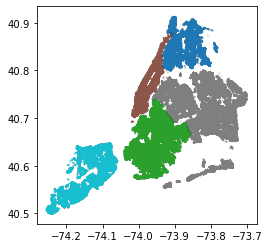

In [44]:
## plot to check geometry - can take a long time
gdf_permits.plot(markersize=1,
                 alpha=0.05,
                 column='boro')

##### Save gdf_permits points geodataframe
(Interim checkpoint in case of kernel death, etc.)

In [22]:
## save permit point shapefile
gdf_permits.to_file('output/gdf_permits')

In [24]:
## save permit point CSV file
gdf_permits.to_csv('output/gdf_permits.csv')

##### Load gdf_permits points geodataframe

In [23]:
## reload permit point file
gdf_permits = gpd.read_file('output/gdf_permits')
gdf_permits

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA,geometry
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,None,3530,13,...,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood,POINT (-73.89945 40.70655)
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,None,3960,25,...,NaN,7184454700,2022-05-09,100,40.790594,-73.838244,19.0,945.0,Whitestone,POINT (-73.83824 40.79059)
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,None,5030,76,...,NaN,7186242615,2022-05-09,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate,POINT (-73.95272 40.66071)
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,None,4615,6,...,NaN,7187466014,2022-05-09,100001,40.787958,-73.795952,19.0,991.0,Whitestone,POINT (-73.79595 40.78796)
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,None,1903,139,...,NaN,2126782100,2022-05-09,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South,POINT (-73.94887 40.80420)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992498,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,None,5030,75,...,NaN,7182919595,2022-05-09,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate,POINT (-73.95282 40.66070)
992499,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824,71,...,NaN,7184656400,2022-05-09,999987,40.710120,-73.791458,27.0,462.0,Jamaica,POINT (-73.79146 40.71012)
992500,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051,80,...,NaN,2120000000,2022-05-09,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights,POINT (-73.94441 40.82249)
992501,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,None,5495,431,...,NaN,9179067575,2022-05-09,999998,40.619611,-73.978647,44.0,468.0,Borough Park,POINT (-73.97865 40.61961)


# Aggregating Spatialized Data

## School District Boundaries
*Will be used to understand new construction and alterations within school districts.*

Department of City Planning (DCP). “School Districts.” ESRI Shapefile, Polygon Boundaries. \
New York, NY: NYC OpenData, Bytes of the Big Apple, May 6, 2024. \
Accessed July 26th, 2024 via: https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj

##### Load from API

In [25]:
SD_API = "https://data.cityofnewyork.us/resource/cuae-wd7h.geojson"
SD_outputpath = 'data/gdf_permits_SchoolDistrict'

if os.path.exists(SD_outputpath):
    ## reload previous
    gdf_SD = gpd.read_file(SD_outputpath)
    ## reformat to string with leading zero
    gdf_SD = gdf_SD.rename(columns={'school_dis':'schooldist'})
else:
    ## read from the API
    gdf_SD = gpd.read_file(SD_API)
    gdf_SD = gdf_SD.rename(columns={'school_dist':'schooldist'})
    gdf_SD.to_file(SD_outputpath)

## remove the duplicate geometry in original data
gdf_SD = gdf_SD.drop_duplicates(subset=['schooldist'])

## reformat to string with leading zero
gdf_SD['schoolstr'] = gdf_SD['schooldist'].astype('str').str.zfill(2)

## reproject to same projection as CRS file
gdf_SD = gdf_SD.to_crs(gdf_permits.crs)

print(gdf_SD.crs) # check coordinate ref system, make sure it matches point file
display(gdf_SD)

epsg:4326


,schooldist,shape_leng,shape_area,geometry,schoolstr
0,18,120925.187236,175191726.482,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",18
1,3,51922.3285231,113412690.636,"POLYGON ((-73.95672 40.78660, -73.95716 40.785...",03
2,22,270190.685308,385611566.706,"MULTIPOLYGON (((-73.91990 40.59960, -73.91996 ...",22
3,13,86649.0963736,104871083.068,"POLYGON ((-73.97906 40.70595, -73.97924 40.705...",13
4,16,35848.9081061,46763798.9402,"POLYGON ((-73.93312 40.69579, -73.93237 40.695...",16
5,32,37251.0606877,51898318.061,"POLYGON ((-73.91181 40.70343, -73.91290 40.702...",32
6,1,28647.0153568,35160467.8445,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",01
7,12,48690.620264,69089358.6594,"POLYGON ((-73.88284 40.84782, -73.88200 40.847...",12
8,15,153439.200201,196154191.521,"POLYGON ((-73.98633 40.69105, -73.98536 40.690...",15
9,17,68356.1019864,128440514.782,"POLYGON ((-73.92044 40.66563, -73.92061 40.665...",17


##### Re-load previous, or clean and save version of data for analysis

In [26]:
permits_SD_outputpath = 'output/gdf_permits_SchoolDistrict'

if os.path.exists(permits_SD_outputpath): # if directory exists...
    gdf_permits = gpd.read_file(SD_outputpath, # reload
                                parse_dates = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']) # read as datetime
else:
    ## Spatial Join
    gdf_permits = gpd.sjoin(gdf_permits, # point file
                            gdf_SD[['schooldist', 'schoolstr', 'geometry']], # school district boundary
                            how='left') # SPATIAL JOIN
    print("Finished spatial join.")
    gdf_permits = gdf_permits.drop(columns=['index_right'], errors='ignore') # drop unnecessary columns from spatial join
    gdf_permits.to_csv('output/gdf_permits_SchoolDistrict.csv') # CSV
    print("Exported CSV file.")
    gdf_permits.to_file('output/gdf_permits_SchoolDistrict') # shapefile
    print("Explorted shapfile.")

print(gdf_permits['schooldist'].isna().value_counts()) # check quality of join by missing values
see_cols(df_permits)
display(gdf_permits)

## Atomic Polygons

*Intersection of multiple boundaries by DCP. \
Can be used when comparing new construction and alterations between school districts and other types of boundaries.*

Department of City Planning (DCP). “Atomic Polygons.” ESRI Shapefile, Polygon Boundaries. \
New York, NY: NYC OpenData (Bytes of the Big Apple), June 16, 2024. \
Accessed July 26, 2024 via: https://data.cityofnewyork.us/City-Government/Atomic-Polygons/djze-f4qi

##### Download from local file or from API

In [ ]:
AP_API = "https://data.cityofnewyork.us/resource/wgbs-damt.geojson"
AP_download_outputpath = "data/_download/Atomic Polygons"
AP_outputpath = "data/atomicpolygons"

if os.path.exists(AP_outputpath): # if directory exists...
    gdf_AP = gpd.read_file(AP_outputpath) # read previously called API file
elif os.path.exists(AP_download_outputpath): # if directory exists...
    gdf_AP = gpd.read_file(AP_download_outputpath) # read downloaded file on local drive
else: # call API (may take a long time)
    gdf_AP = gpd.read_file(AP_API + urlencode({'$limit':'70000'})) # 69602 polygons
    gdf_AP.to_file(AP_outputpath ) # save for next time

## rename school district column to avoid conflicting
gdf_AP = gdf_AP.rename(columns={'schooldist':'atomicSD'})

## reproject to same projection as CRS file
gdf_AP = gdf_AP.to_crs(gdf_permits.crs)

print(gdf_AP.crs) # check coordinate ref system, make sure it matches point file
display(gdf_AP)

##### Re-load previous, or clean and save version of data for analysis

In [ ]:
permits_AP_outputpath = 'output/gdf_permits_AtomicPolygons'
date_cols = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']

if os.path.exists(permits_AP_outputpath): # if directory exists...
    gdf_permits = gpd.read_file(permits_AP_outputpath,
                                   parse_dates = date_cols)
else:
    gdf_permits = gpd.sjoin(gdf_permits, 
                            gdf_AP[['atomicid','atomicSD','geometry']], how='left')
    gdf_permits = gdf_permits.drop(columns=['index_right'], errors='ignore')
    gdf_permits.rename(columns=shortname_dict).to_file('output/gdf_permits_AtomicPolygons')

## check spatial data quality
print(gdf_permits['atomicid'].isna().value_counts()) # check number of atomic ids
print(gdf_permits['schooldist'].isna().value_counts()) # check number of school district didn't change
print(gdf_permits['atomicSD'].isna().value_counts()) # compare to atomic polygon school districts

gdf_permits

# Remove Nulls Impacting Visualization

In [33]:
## Clean-Up Column(s) used for Mapping (Destructively)
gdf_permits['schoolstr'] = gdf_permits['schooldist'].astype('int64', errors='ignore') # set to int to get rid of float decimal places
gdf_permits = gdf_permits.dropna(subset=['geometry', 'datejob','schooldist']) # remove null values for fields necessary for visualization
gdf_permits['schoolstr'] = gdf_permits['schooldist'].astype('str').str.zfill(2) # reformat to string with leading zero
gdf_permits

C:\Users\willy\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,dobrundate,permnum,latitude,longitude,CD,CT,NTA,geometry,schooldist,schoolstr
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,None,3530,13,...,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood,POINT (-73.89945 40.70655),24,24
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,None,3960,25,...,2022-05-09,100,40.790594,-73.838244,19.0,945.0,Whitestone,POINT (-73.83824 40.79059),25,25
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,None,5030,76,...,2022-05-09,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate,POINT (-73.95272 40.66071),17,17
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,None,4615,6,...,2022-05-09,100001,40.787958,-73.795952,19.0,991.0,Whitestone,POINT (-73.79595 40.78796),25,25
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,None,1903,139,...,2022-05-09,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South,POINT (-73.94887 40.80420),3,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992498,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,None,5030,75,...,2022-05-09,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate,POINT (-73.95282 40.66070),17,17
992499,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824,71,...,2022-05-09,999987,40.710120,-73.791458,27.0,462.0,Jamaica,POINT (-73.79146 40.71012),29,29
992500,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051,80,...,2022-05-09,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights,POINT (-73.94441 40.82249),5,05
992501,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,None,5495,431,...,2022-05-09,999998,40.619611,-73.978647,44.0,468.0,Borough Park,POINT (-73.97865 40.61961),21,21


In [34]:
## Clean-Up Column(s) used for Time Series (Destructively)
for i,c in enumerate(date_cols):
    gdf_permits[c] = pd.to_datetime(gdf_permits[c], errors='coerce')
    gdf_permits = gdf_permits.dropna(subset=[c])
    Ycol = c + 'Y'
    gdf_permits[Ycol] = gdf_permits[c].dt.year.astype('int64', errors='ignore').astype('str', errors='ignore').str.slice(0,4) # year
    YMcol = c + 'YM'
    gdf_permits[YMcol] = gdf_permits[Ycol].str.slice(0,4)+"-"+gdf_permits[c].dt.month.astype('int64', errors='ignore').astype('str', errors='ignore').str.zfill(2).str.slice(0,2) # year-month 
gdf_permits

C:\Users\willy\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\willy\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,datefilY,datefilYM,dateissY,dateissYM,dateexpY,dateexpYM,datejobY,datejobYM,dobrundateY,dobrundateYM
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,None,3530,13,...,2002,2002-11,2002,2002-11,2003,2003-06,2002,2002-11,2017,2017-11
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,None,3960,25,...,1992,1992-06,1992,1992-06,1992,1992-11,1991,1991-09,2022,2022-05
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,None,5030,76,...,1998,1998-04,1998,1998-04,1999,1999-04,1998,1998-03,2022,2022-05
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,None,4615,6,...,1990,1990-10,1990,1990-10,1991,1991-08,1990,1990-10,2022,2022-05
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,None,1903,139,...,2002,2002-05,2002,2002-05,2003,2003-05,2002,2002-05,2022,2022-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992498,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,None,5030,75,...,1998,1998-04,1998,1998-04,1999,1999-04,1998,1998-03,2022,2022-05
992499,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824,71,...,2003,2003-10,2003,2003-10,2004,2004-01,2003,2003-10,2022,2022-05
992500,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051,80,...,2006,2006-03,2006,2006-03,2006,2006-04,2005,2005-06,2022,2022-05
992501,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,None,5495,431,...,2007,2007-04,2007,2007-04,2008,2008-03,2006,2006-05,2022,2022-05


In [35]:
## Save Viz File
gdf_permits.to_csv('output/gdf_permits_Viz.csv')

In [ ]:
## Re-load Viz File
gdf_permits = pd.read_csv('output/gdf_permits_Viz.csv')
display(gdf_permits)

# Mapping Permits per School District

In [38]:
## Summary Table: Permits per School District
permitsSD = gdf_permits[['schoolstr', 'permnum']].groupby('schoolstr').count().rename(columns={'permnum':'count'})

## Ranks (Unused)
permitsSD['rank'] = permitsSD['count'].rank(method='max')

## Normalized Values to Map for Colors
def minmax(s):
    return [(x-s.min())/(s.max()-s.min()) for x in s]
permitsSD['norm'] = minmax(permitsSD['count'])

## Merge to geometry for mapping
permitsSD = pd.merge(permitsSD, gdf_SD, how='left', on='schoolstr')
permitsSD = permitsSD.set_geometry('geometry')

permitsSD['distlabel'] = permitsSD['schoolstr'].apply("#{}".format)
permitsSD['countlabel'] = permitsSD['count'].apply("{:,}".format)

## Mapped Colors
permitsSD['countcolor'] = permitsSD['norm'].apply(lambda x: mpl.colors.to_hex(plt.get_cmap('YlOrBr')(x)))

## Centroid for labels
# permitsSD['cPt'] = permitsSD.centroid
permitsSD['cx'] = permitsSD.centroid.x
permitsSD['cy'] = permitsSD.centroid.y

## Representative point
# permitsSD['rPt'] = permitsSD.geometry.representative_point()
permitsSD['rx'] = permitsSD.representative_point().x
permitsSD['ry'] = permitsSD.representative_point().y

## Duplicate District #10 in original geom
permitsSD = permitsSD.drop_duplicates("schoolstr")

display(permitsSD)

<ipython-input-38-580d008ccd8f>:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  permitsSD['cx'] = permitsSD.centroid.x
<ipython-input-38-580d008ccd8f>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  permitsSD['cy'] = permitsSD.centroid.y


,schoolstr,count,rank,norm,schooldist,shape_leng,shape_area,geometry,distlabel,countlabel,countcolor,cx,cy,rx,ry
0,01,8519,4.0,0.027158,1,28647.0153568,35160467.8445,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",#01,"8,519",#fffddd,-73.982734,40.721440,-73.983076,40.721857
1,02,75118,31.0,0.579434,2,207556.487722,279512457.871,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",#02,"75,118",#f27f1b,-73.986215,40.744522,-73.989733,40.744564
2,03,17333,11.0,0.100249,3,51922.3285231,113412690.636,"POLYGON ((-73.95672 40.78660, -73.95716 40.785...",#03,"17,333",#fff9c5,-73.969007,40.789017,-73.968946,40.789013
3,04,5244,1.0,0.000000,4,52078.4121687,52615581.637,"MULTIPOLYGON (((-73.92134 40.80085, -73.92114 ...",#04,"5,244",#ffffe5,-73.933810,40.792624,-73.942226,40.793282
4,05,14076,9.0,0.073240,5,44522.1807459,52525556.3852,"POLYGON ((-73.93570 40.83515, -73.93562 40.835...",#05,"14,076",#ffface,-73.944440,40.814714,-73.955572,40.817260
5,06,6284,2.0,0.008624,6,69010.3474696,96344129.0222,"POLYGON ((-73.92641 40.87762, -73.92635 40.877...",#06,"6,284",#fffee2,-73.934944,40.849564,-73.937500,40.847367
6,07,10973,5.0,0.047508,7,65300.4281422,92258548.0341,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",#07,"10,973",#fffcd6,-73.911050,40.808781,-73.917989,40.813827
7,08,23025,15.0,0.147450,8,222041.43911,258761330.318,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...",#08,"23,025",#fff4b5,-73.850101,40.822400,-73.861141,40.818159
8,09,11851,7.0,0.054789,9,44448.1144858,82980176.5706,"MULTIPOLYGON (((-73.93309 40.82823, -73.93307 ...",#09,"11,851",#fffbd3,-73.913414,40.839005,-73.913564,40.839180
9,10,16987,10.0,0.097380,10,94958.4212767,282541964.538,"POLYGON ((-73.86790 40.90294, -73.86796 40.902...",#10,"16,987",#fff9c6,-73.893310,40.879606,-73.889374,40.878147


In [39]:
## Export
permitsSD.to_csv('output/permitsSD.csv')
permitsSD.to_file('output/permitsSD')

'Univers-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'Univers.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


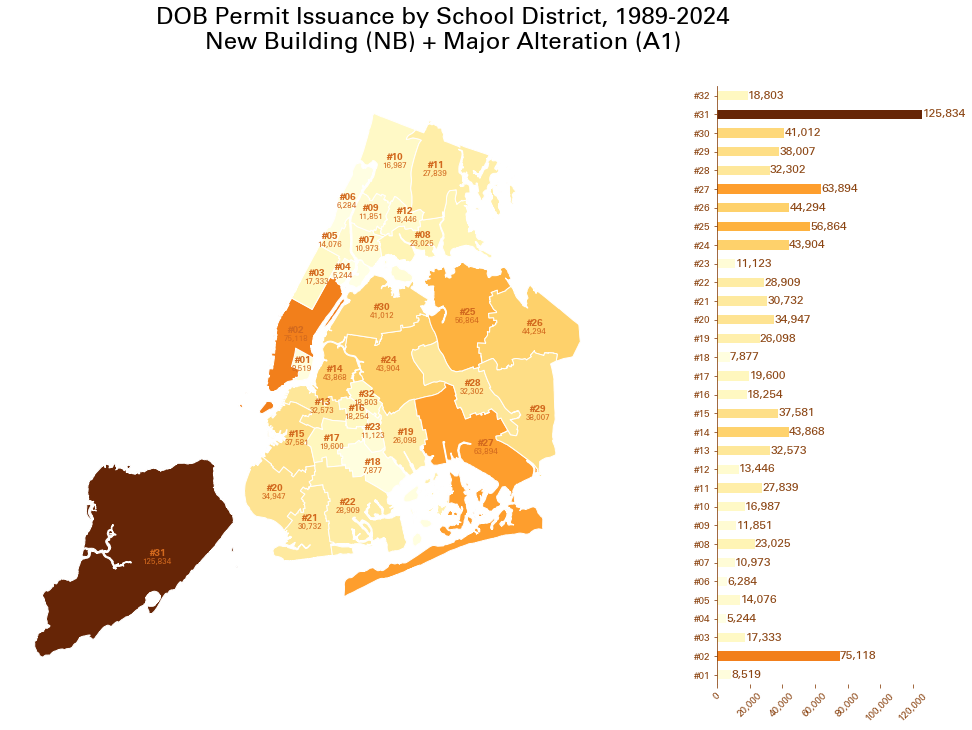

In [41]:
## MAP
fig, ax = plt.subplots(1,2, 
                       figsize=(17,11), 
                       gridspec_kw={'width_ratios': [3, 1]})

## AXES 0
## fill
permitsSD.plot(ax=ax[0], 
               column='count', 
               cmap='YlOrBr',
               edgecolor='white')

## labels for school districts
permitsSD.apply(lambda x: ax[0].annotate(text=x['distlabel'], 
                                      xy=x.geometry.representative_point().coords[0],
                                      color = "chocolate",
                                      fontname="Univers",
                                      fontweight="bold",
                                      va='bottom',
                                      ha='center'), axis=1)
## labels for counts
permitsSD.apply(lambda x: ax[0].annotate(text=x['countlabel'], 
                                      xy=x.geometry.representative_point().coords[0],
                                      color = "chocolate",
                                      fontname="Univers",
                                      fontsize=8,
                                      va='top',
                                      ha='center'), axis=1)
## formatting    
ax[0].set_axis_off()


## AXES 1
## bar chart as legend
permitsSD.plot.barh(ax=ax[1], x='distlabel', y='count', 
                    color=permitsSD['countcolor'])
## bar chart labels
for i, v in enumerate(permitsSD['count']):
    ax[1].text(v + 100, i, "{:,}".format(v), color='saddlebrown', fontname='Univers', fontsize=12, ha='left', va='center')

## Format Ticks
plt.xticks(fontname = 'Univers')
plt.yticks(fontname = 'Univers')
ax[1].tick_params(axis='y', colors='saddlebrown')
ax[1].tick_params(axis='x', colors='saddlebrown', rotation=45)
ax[1].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
## Format Axes
ax[1].spines['left'].set_color('saddlebrown')
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].yaxis.label.set_visible(False)
## Bar chart substitutes for legend
ax[1].get_legend().remove()
## Title
fig.suptitle(t="DOB Permit Issuance by School District, 1989-2024\nNew Building (NB) + Major Alteration (A1)",
             fontsize=24,
             fontname='Univers',
             color="black")

plt.savefig('export/permitsMap+Bar.pdf', dpi=300)
plt.savefig('export/permitsMap+Bar.svg', dpi=300)

# Time Series of Permits per Month

In [47]:
geocol = 'schoolstr'
timecol = 'dateissYM'
countcol = 'permnum'

## Groupby school district and month
permitsSDMonthly = gdf_permits[[geocol, timecol, countcol]].groupby([geocol, timecol]).count().reset_index()
permitsSDMonthly.to_csv('output/permitsSDMonthly.csv')
display(permitsSDMonthly)

## School district as columns and months and index for time series plot
permitsSDMonthlytable = permitsSDMonthly.pivot(index=timecol, columns=geocol, values=countcol).fillna(0).astype('int64')
permitsSDMonthlytable.to_csv('output/permitsSDMonthlytable.csv')
display(permitsSDMonthlytable)

,schoolstr,dateissYM,permnum
0,01,1990-06,2
1,01,1990-07,6
2,01,1990-08,1
3,01,1990-09,4
4,01,1990-10,5
...,...,...,...
13112,32,2024-03,15
13113,32,2024-04,13
13114,32,2024-05,24
13115,32,2024-06,16


schoolstr,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,32
dateissYM,,,,,,,,,,,,,,,,,,,,,
1989-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1989-06,0,0,0,0,0,0,3,0,0,0,...,0,0,2,0,3,0,1,0,0,0
1989-07,0,0,0,0,0,0,2,0,0,0,...,0,0,2,6,2,0,0,1,0,0
1989-08,0,0,0,0,0,0,2,0,0,0,...,0,2,3,9,1,2,3,5,0,0
1989-09,0,0,0,0,0,0,1,0,0,0,...,0,7,9,17,8,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03,9,71,13,2,8,9,9,10,7,29,...,8,18,34,23,23,26,8,46,43,15
2024-04,7,72,8,4,2,9,7,13,19,28,...,15,18,36,27,28,18,21,31,27,13
2024-05,31,72,11,5,9,8,5,10,11,27,...,8,24,27,10,20,23,15,27,39,24


In [48]:
## table for horizontal lines at each maximum
permitsSDMonthlymax = pd.concat([permitsSDMonthlytable.idxmax().rename('YM'), # concatenate each series
                               permitsSDMonthlytable.max().rename('max')],
                               axis=1).sort_values('max', ascending=False) # sort as highest at top
permitsSDMonthlymax.to_csv('output/permitsSDMonthlymax.csv')
permitsSDMonthlymax

,YM,max
schoolstr,,
31,2003-10,1049
27,2005-03,667
29,2007-01,480
14,2008-06,407
02,2016-06,385
19,2006-05,358
24,2005-12,357
25,2005-07,340
28,2006-03,332


'Univers.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


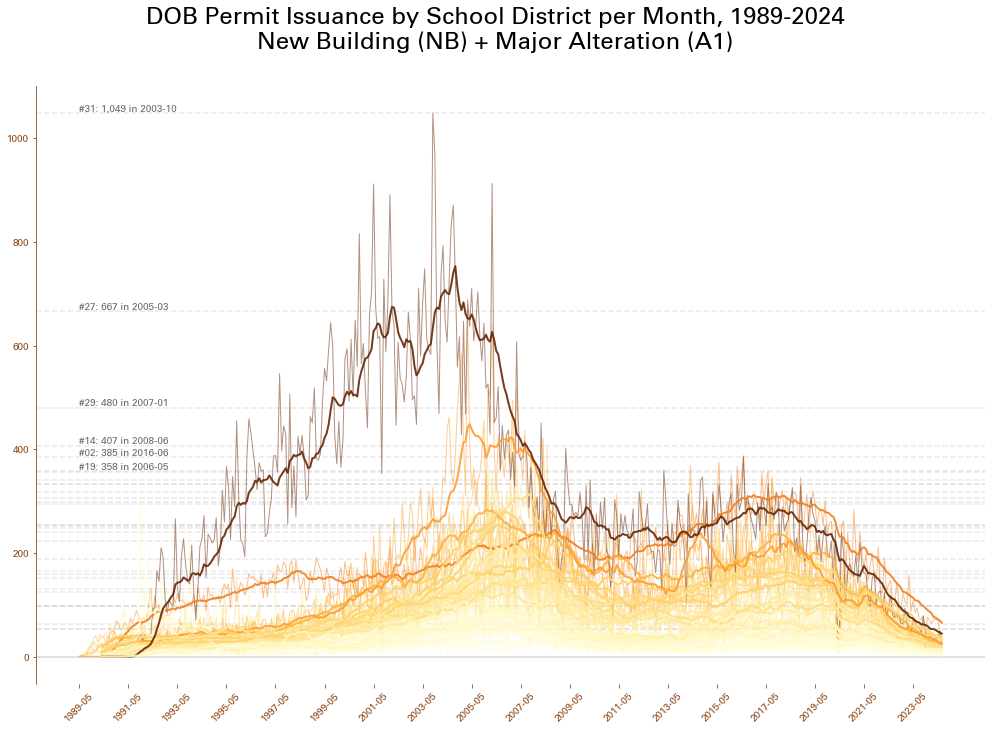

In [49]:
fig, ax = plt.subplots(figsize=(17,11), sharex=True, sharey=True)

## MAXIMUMS
## loop through horizontal lines with maximum
for i, v in enumerate(permitsSDMonthlymax['max']):
    plt.axhline(v, color='lightgrey', linestyle='--',alpha=0.5)
## label with a few of the maximums at the top
for i, v in enumerate(permitsSDMonthlymax['max'][0:6]):
    plt.text(0.01, v, 
             "#{}: {:,} in {}".format(str(permitsSDMonthlymax.index[i]), v,
                                    str(permitsSDMonthlymax['YM'][i])),
             fontname='Univers',
             color='dimgrey',
             ha='left', va='bottom')
## zero line
plt.axhline(0, color='lightgrey', alpha=0.9)

## TIME SERIES PLOT
permitsSDMonthlytable.plot(ax=ax, 
                           color=permitsSD['countcolor'],
                           linewidth=1,
                           alpha=0.5)

## ROLLIN AVERAGE 1-year
permitsSDMonthlytable.rolling(12, axis=0).mean().plot(ax=ax, 
                           color=permitsSD['countcolor'],
                           linewidth=2,
                           alpha=0.9)

## Format Ticks
## Ticks every 24 months or 2 years
plt.xticks(range(len(permitsSDMonthlytable))[::24], 
           permitsSDMonthlytable.index.tolist()[::24], 
           rotation=45, fontname = 'Univers')
plt.yticks(fontname = 'Univers')
ax.tick_params(axis='y', colors='saddlebrown')
ax.tick_params(axis='x', colors='saddlebrown')
## Format Axes
ax.spines['left'].set_color('saddlebrown')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_visible(False)
## Long Legend isn't very helpful
ax.get_legend().remove()
## Title
fig.suptitle(t="DOB Permit Issuance by School District per Month, 1989-2024\nNew Building (NB) + Major Alteration (A1)",
             fontsize=24,
             fontname='Univers',
             color="black")

plt.savefig('export/permitsTimeSeries.pdf', dpi=300)
plt.savefig('export/permitsTimeSeries.svg', dpi=300)